In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('./brain-tumor-classification-mri'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./brain-tumor-classification-mri\Testing\glioma_tumor\image(1).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(10).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(100).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(11).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(12).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(13).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(14).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(15).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(16).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(17).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(18).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(19).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(2).jpg
./brain-tumor-classification-mri\Testing\glioma_tumor\image(20).jpg
./brain-tumor-classification-mri\Testing\glioma_t

In [2]:
import setuptools as _distutils
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import accuracy_score

In [3]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

In [4]:
X_train = []
Y_train = []
image_size = 150
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
paths = []
label  = []

for i in labels:
    folderPath = os.path.join('./brain-tumor-classification-mri/Training',i)
    paths.append(folderPath)
    label.append(i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_train.append(img)
        Y_train.append(i)
        
for i in labels:
    folderPath = os.path.join('./brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        if img is not None:
            img = cv2.resize(img,(image_size,image_size))
            X_train.append(img)
            Y_train.append(i)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

data ={
    'Path':paths,
    'label':label
}
df = pd.DataFrame(data)

df.to_csv('dataset.csv',index=False)
display(df)

,Path,label
0,./brain-tumor-classification-mri/Training\glio...,glioma_tumor
1,./brain-tumor-classification-mri/Training\meni...,meningioma_tumor
2,./brain-tumor-classification-mri/Training\no_t...,no_tumor
3,./brain-tumor-classification-mri/Training\pitu...,pituitary_tumor


In [5]:
X_train,Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X_train,Y_train,test_size=0.1,random_state=101)

In [7]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [8]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

c:\Users\yuvan\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 69, 69, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,277,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,447,044 (16.96 MB)

 Trainable params: 4,447,044 (16.96 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [11]:
history = model.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.2614 - loss: 4.5244 - val_accuracy: 0.2891 - val_loss: 1.3639
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 87s 1s/step - accuracy: 0.2838 - loss: 1.3628 - val_accuracy: 0.2789 - val_loss: 1.3670
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.2812 - loss: 1.3526 - val_accuracy: 0.2755 - val_loss: 1.3590
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.2932 - loss: 1.3437 - val_accuracy: 0.2721 - val_loss: 1.3624
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.2761 - loss: 1.3670 - val_accuracy: 0.2857 - val_loss: 1.3719
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.2814 - loss: 1.3606 - val_accuracy: 0.2721 - val_loss: 1.3674
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.3029 - loss: 1.3469 - val_accuracy: 0.3129 - val_loss: 1.3331
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.3228 - loss: 1.3296 - val_accuracy: 0.4626 - val_loss

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_prob = model1.predict(X_test) 
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'], 
            yticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [12]:
model.save('braintumor.keras')

In [13]:
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), padding='same'))
model1.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2, 2))

model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2, 2))

model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2, 2))

model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2, 2))

model1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model1.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2, 2))

model1.add(Flatten())
model1.add(Dense(1024, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dropout(0.5))
model1.add(Dense(4, activation='softmax'))
model1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 150, 150, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 150, 150, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 150, 150, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 75, 75, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 75, 75, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 75, 75, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 37, 37, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 37, 37, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 37, 37, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 18, 18, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 18, 18, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 18, 18, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 9, 9, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 9, 9, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 9, 9, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 13,114,020 (50.03 MB)

 Trainable params: 13,109,988 (50.01 MB)

 Non-trainable params: 4,032 (15.75 KB)

In [14]:
model1.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history1 = model1.fit(X_train,y_train,epochs=20,validation_split=0.1)

Epoch 1/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.4935 - loss: 1.6655 - val_accuracy: 0.1667 - val_loss: 18.6170
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.6249 - loss: 1.1051 - val_accuracy: 0.2517 - val_loss: 6.7093
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.7135 - loss: 0.7830 - val_accuracy: 0.6259 - val_loss: 1.2099
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.7557 - loss: 0.6965 - val_accuracy: 0.6735 - val_loss: 0.7965
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.7945 - loss: 0.5753 - val_accuracy: 0.8231 - val_loss: 0.4628
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8554 - loss: 0.4102 - val_accuracy: 0.4728 - val_loss: 2.3154
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.8906 - loss: 0.3120 - val_accuracy: 0.8844 - val_loss: 0.3821
Epoch 8/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 99s 1s/step - accuracy: 0.9210 - loss: 0.2412 - val_accuracy: 0.6973 - val_lo

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 269ms/step


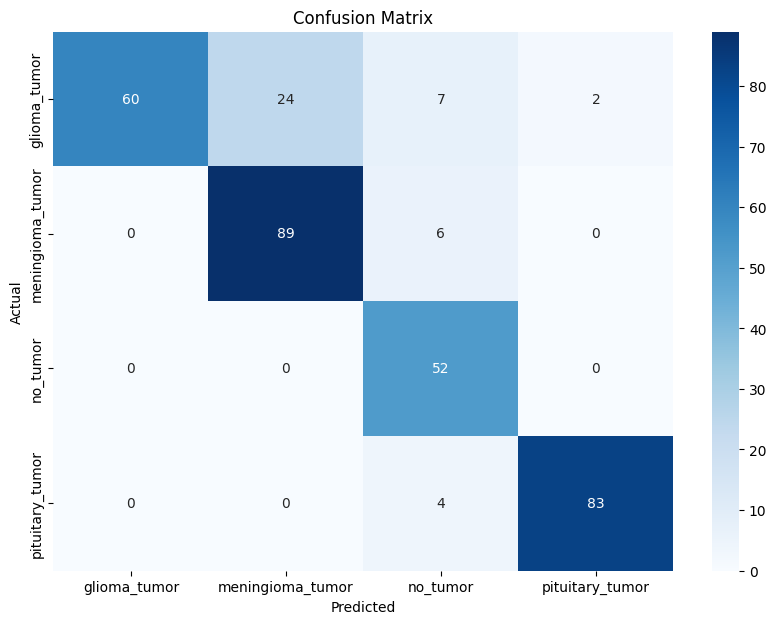

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_prob = model1.predict(X_test) 
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'], 
            yticklabels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [17]:
accuracy_per_class = []
precision_per_class = []
recall_per_class = []
f1_per_class = []

for i in range(cm.shape[0]):
    TP = cm[i][i]           
    FP = cm[:, i].sum() - TP 
    FN = cm[i].sum() - TP

    accuracy = TP / (TP + FN) if (TP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    accuracy_per_class.append(accuracy)
    precision_per_class.append(precision)
    recall_per_class.append(recall)
    f1_per_class.append(f1)


for i in range(cm.shape[0]):
    print(f"\nClass {i}:")
    print(f"Accuracy for Class {i}: {accuracy_per_class[i]:.2f}")
    print(f"Precision: {precision_per_class[i]:.2f}")
    print(f"Recall: {recall_per_class[i]:.2f}")
    print(f"F1 Score: {f1_per_class[i]:.2f}")



Class 0:
Accuracy for Class 0: 0.65
Precision: 1.00
Recall: 0.65
F1 Score: 0.78

Class 1:
Accuracy for Class 1: 0.94
Precision: 0.79
Recall: 0.94
F1 Score: 0.86

Class 2:
Accuracy for Class 2: 1.00
Precision: 0.75
Recall: 1.00
F1 Score: 0.86

Class 3:
Accuracy for Class 3: 0.95
Precision: 0.98
Recall: 0.95
F1 Score: 0.97


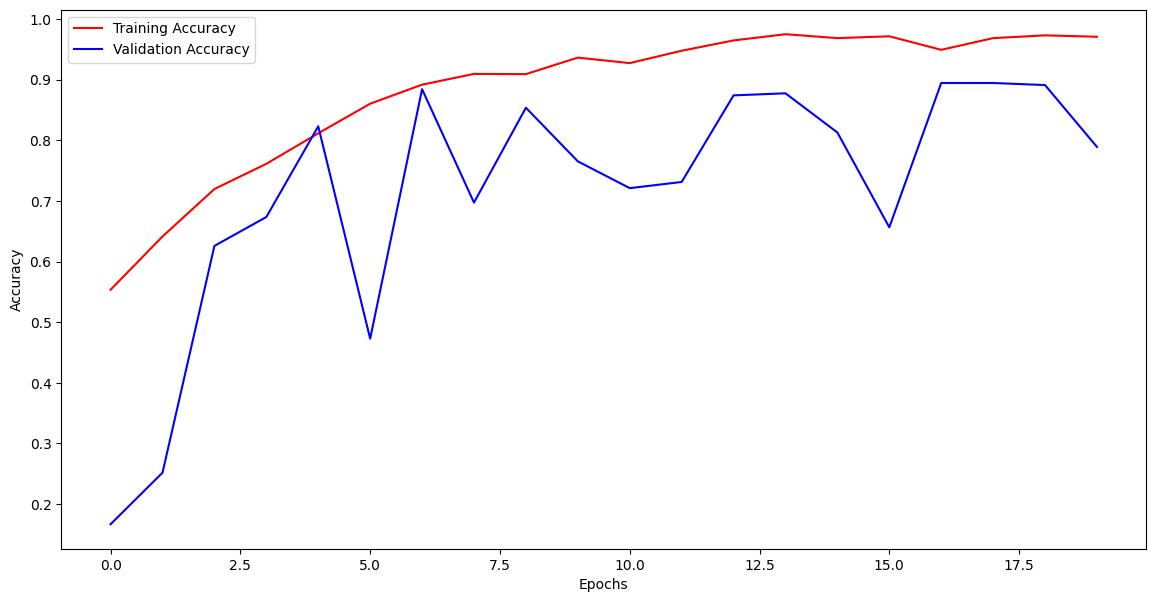

In [18]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

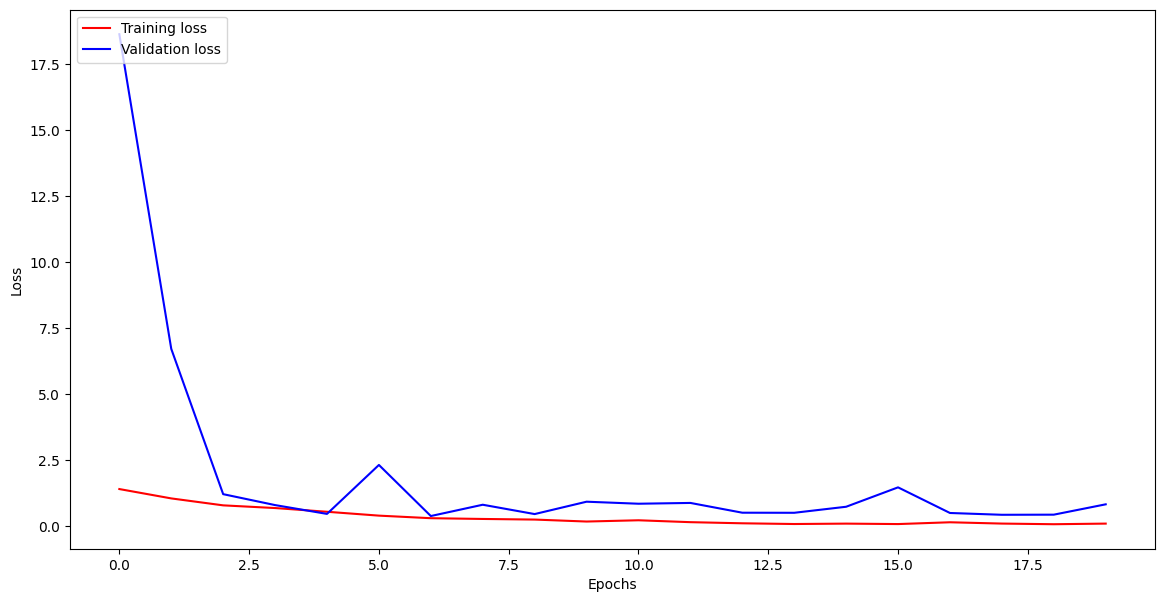

In [19]:
loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
  Glioma Tumor Meningioma Tumor  No Tumor Pituitary Tumor
0     0.018385         0.971182  0.009651        0.000783


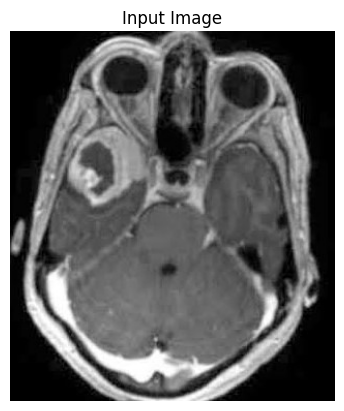


Predicted class: Meningioma Tumor


In [20]:
image_path = 'D:/GOKUL/project 1/uploads/image(9).jpg'
image = Image.open(image_path)

img = image.resize((150, 150))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
class_labels = ['Glioma Tumor', 'Meningioma Tumor', 'No Tumor', 'Pituitary Tumor']

predictions_df = pd.DataFrame(predictions,columns=[class_labels])

predicted_class = class_labels[np.argmax(predictions)]
print(predictions_df)

plt.imshow(image) 
plt.title("Input Image") 
plt.axis('off') 
plt.show()

print("\nPredicted class: "+ predicted_class)